<a href="https://www.kaggle.com/code/iamarunkumar/5-support-vector-regression?scriptVersionId=178327963" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Support Vector Regression

SVR was **invented back in '90s by Vladimir Vapnik et al** when they were working at Bell Labs(formerly AT&T Bell Labs and now it's Nokia Bell Labs).

When comparing SVR with simple linear regression model, we are minimizing the error by having a line with minimum error possible (we are having the line of regression that goes through the data and it's derived by ordinary least square method-minimize the difference between the y & yhat points and square it)-intution of simple LR. 

**whereas in SVR** instead of simple line we see a tube. The regression line will be in the middle and the tube around it. This tube has a width of epsilon and the width is measured vertically along the y-axis and not perpendicular to the tube. This tube is called as **epsilon insensitive tube**. It means, any points in our dataset that are inside this tube is disregarded. We don't care about it. Think it of a margin of error that we are allowing our model to have some flexibility. Those errors that are inside the tube are not considered because of the reason giving some flexibility or giving some buffer to tube.

But those points that are outside the epsilon insensitive tube are really considered and are cared about the error. The **distance between the tube and the point are measured** and not the trendline (regression line). These distances are called **eksi (refer the video for denotion) and eksi star**.

Those errors lying below the epsilon insensitive tube are called as **eksi star**
Those that are lying above the tube are called as just **eksi**.
These eksi's values are commonly called as **slack variables**

There is a specific formula to find the distances of eksi. It is,

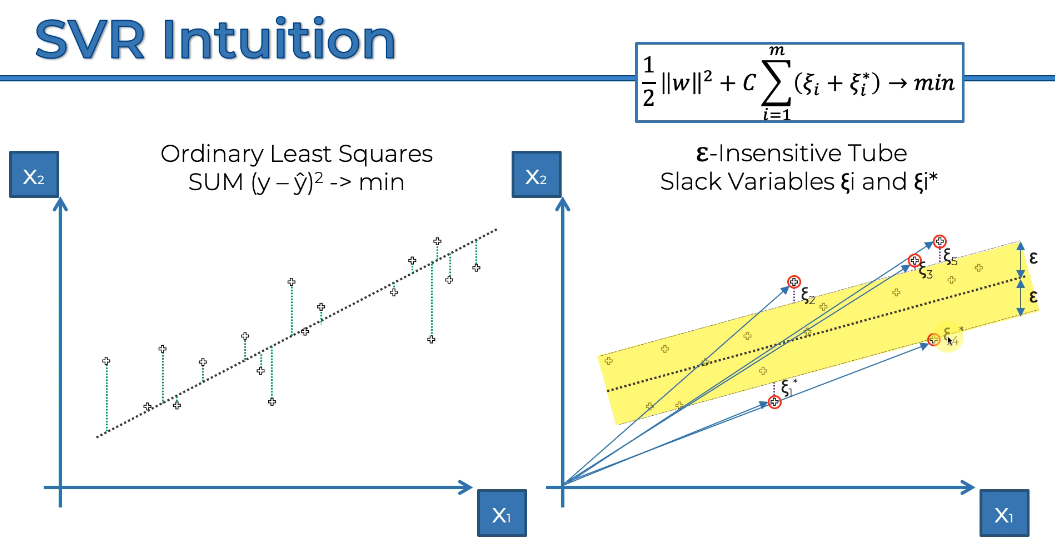

the first portion (until summation) is not bothered. we calculate or focus only from summation.

**SVR intituation - the sum of the distances of all eksis to be minimal**

Those points that are outside the tube are dictating what the tube will look like and how the tube will be positioned.

**Why is this method are called support vector machines ?**

**Answer** - Effectively these points outside the tube or be it with any point on this plot is a vector. They can be represented as vector in two dimensional space or even multidimensional space. Those points that are outside the tube are support vectors because they are dictating how this tube is created. They are supporting the structure or formation of the tube.

# Importing required libraries

In [ ]:
# Let's import required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Importing dataset

In [ ]:
# Let's import the dataset. We use the same dataset here from polynomial regression model.
df = pd.read_csv('/kaggle/input/salary-details/Position_Salaries.csv')

# Same like previous regression, we will consider only the level column ignoring the position column. hence df.iloc[:,1:-1]
X = df.iloc[:,1:-1].values
y = df.iloc[:,-1].values
print(X)
print(y)

# Feature Scaling

In SVR, we need to perform feature scaling since don't have the explicit equation of the dependent variable wrt features. And, mostly there are not those coefficients multiplied to each of the features.

SVR has implicit equation of dependent variables wrt features and we don't have such coefficients.

**We don't need to apply feature scaling technique to linear regression models (single, multiple and polynomial) where we have co-efficients that can compensate with the high values of the features**

**On the other hand, those models that has implicit relationship between the dependent variables y and features X will have to be applied with feature scaling.

**Quick look back** - If you look back the data preprocessing phase, we wouldn't applied the feature scaling for dependent variable y. That's because the values of y are between 0s and 1s. But here in our salary data, we need to apply feature scaling for dependent variable y since the salary column (dependent variable vector y) is much higher when compared to the features column (level). If we didn't apply feature scaling for those columns that are much higher to the other column, the **model would neglect the column which has lower values** and that's wrong.

**So, whenever the difference of column values are higher/lower, we need to apply feature scaling for both features & dependent variable vectors.

**when do we don't apply feature scaling ?**

1. we don't apply feature scaling for dummy variables resulting from one hot encoding
2. We don't apply feature scaling for dependent variables that take binary values 0s and 1s

**when do we need to apply feature scaling ?**
1. When the dependent variables take higher values with respect to other features, we need to apply feature scaling to all the  features & dependent variable vector
2. We need to apply feature scaling only after splitting the dataset into training set and test set

Finally, by the end of this implementation, we also know about feature scaling that **the inverse transformation of feature scaling - when we scale our features or dependent varibale at some point to get the final prediction and visualize the results, we will inverse the feature scaling or inverse the transformation to go back to original scale**.

In [ ]:
""" Before we do feature scaling, we need to reshape the dependent variable y into 2d array since it's in 1d vector.
 Why do we need to reshape it to 2d array - because the StandardScaler()  class expects the input to be in 2d array when 
we pass the feature & dependent variable as inputs. So, let's first reshape the dep.variable y using reshape() method 
of numpy. reshape() method expects rows and columns respectively as the inputs."""

y =  y.reshape(len(y),1)

In [ ]:
"""Let's import the Standard Scaler class from preprocessing module of sklearn library.

Here we need to apply feature scaling for both dependent variable and features. We use two different variable for
features and dependent variable. why do we do that? because when we fit the object 'sc' on our data, it will compute mean 
and std.deviation of that same variable and since we don't have same mean and std.deviation for levels (feature) & 
salary (dep.variable vector) we create two different object for Standard Scaler and assign it to feature & 
dep.variable vector."""

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

# Training SVR on the whole dataset

Remember the intuition class of SVR and intuition of SVM, we have something called **kernel** which learn from linear relationships and they are called **linear kernels**. Also, for non-linear relationships, they are called **non-linear relationships** which use **RBF-Radial basis function**. So RBF is a non-linear kernel or used for non-linear support vectors.

There are different forms of kernels both in linear & non-linear viz. Polynomial kernel, Gaussian kernel, Hyperbolic tangent kernel, Laplace RBF kernel, Sigmoid kernel, Gaussian RBF.

The most **famous kernel is Radial basis function kernel** which is what we are going to use.

In [ ]:
# Let's import the SVR class from svm module of sklearn library
from sklearn.svm import SVR

"""Creating object and using the kernel type RBF as a parameter for SVR class. 'RBF' is the code to pass the value. Now
the SVR model is built"""
regressor = SVR(kernel='rbf')

"""Let's train the SVR model which is built using the kernel function"""
regressor.fit(X,y)



# Predicting a new result

This step will teach you how to reverse scaling for our predictions. When we apply the predict method to predict the new result, it will be returned in the new scale of y (dep.variable vector) after it was transformed. So, we need to reverse the scaling or do reverse transformation to get the original scale of y (dep.variable vector) 

In [ ]:
"""Usually in predict() we pass 'X_test' as parameter. Since we didn't split the dataset into train-test split, we will
directly pass the expected result-which is the level of expererience between 6 & 7 (value between 6 & 7 is chosen because
the expected salary of the candidate is 160k/annum which falls b/w 6 & 7.) So the expected result is 6.5

However, we cannot pass directly 6.5 in predict() because our SVR model was trained on the scaled values(sc_X) of the
training set. So we need to pass the scaled value in the predict(). That means we use transform() of scaled values of x.
Remember, we use transform() and not fit_transform(). Now, we pass 6.5 in transform method within double bracket.
Remember, always we need to pass the 2D array in predict() as an input.

Now, time to do reverse scaling- we not only scaled sc_X(features) but also the output y dep.variable(sc_y) and we used
that scaled object to scale the output y. Since, the output y is scaled, in order to get the original salaries
(original scales)  of y we need to do reverse scaling to the whole prediction and that's achieved using the 
inverse_transform() of sc_y. Remember we want to bring back the original scaling of y and hence we
use reverse scaling on sc_y or sc_y.inverse_transform()/

One last thing - To avoid a format error,we must add inside the parenthesis of inverse_transform() a reshape() with the
values -1 & 1. This is just for SVR model and we don't use this for any other models"""

sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])).reshape(-1,1))

"""Finaly, we got the output as array([[170370.0204065]]). which is approx.170k. Almost a good prediction"""

# Visualizing the SVR results

In [ ]:
"""Note - We copied this piece of code from polynomial regression of visualization section and modified wherever
necessary.

Firstly, in scatter() we need to pass X & y. since both X & y are scaled and we should only pass original values, we need
to apply inverse_transform(). That is sc_X.inverse_transform(X) and sc_y.inverse_transform(y).
Nex in plot(), Remember, always we use first coordinate as X or X_train and second coordinate as predict() of X_train or
X_poly.
Now in  plot() for X-coordinate we need to pass X, since it's scaled we do inverse_transform (sc_C.inverse_transform(X))for
reverse scaling and for y-coordinate, simply copy the predict section (just above) and follow below explanation to make
necessary changes.

    **sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])).reshape(-1,1))**

y-coordinate in plot() explanation : Let's start from predict(), Ofcourse we need to replace [[6.5]] by X but here we had
to apply sc_X.transform on 6.5 because 6.5 is the original scale and the predict() has to be passed on to the scaled values
but now since we apply predict() on X and since X is already scaled, we don't need to apply transform method once again.
So, we just replace sc_X.transform([[6.5]]) by X alone. The rest will remains same."""

plt.scatter(sc_X.inverse_transform(X),sc_y.inverse_transform(y),color='red')
plt.plot(sc_X.inverse_transform(X),sc_y.inverse_transform(regressor.predict(X).reshape(-1,1)),color='blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salaries')
plt.show()

# Visualizing SVR results (for higher resolution and smoother curve)

In [ ]:
"""As such copy the entire code of visualizing higher resolution section of polynomial regression and make necessary 
changes.
Firstly, we need to pass the scaled inverse transform() for both min() & max() of X_grid variable because we predicted
using scaled value.
Next, in scatter(), follow same step of passing the scaled inverse transform() of X & y.
Next, in plot(), let the X_grid be same without disturbing it. Copy the entire y-cordinate from previous section 
(Visualizing the SVR results) and follow upcoming necessary changes. In predict(), pass the scaled transform() of X_grid
instead of direct X. Remember, it's just transform() and not inverse_transform() since while assigning initially, X_grid
is already scaled with inverse_transform()."""

X_grid = np.arange(min(sc_X.inverse_transform(X)),max(sc_X.inverse_transform(X)),0.1)
X_grid = X_grid.reshape(len(X_grid),1)
plt.scatter(sc_X.inverse_transform(X),sc_y.inverse_transform(y),color='red')
plt.plot(X_grid, sc_y.inverse_transform(regressor.predict(sc_X.transform(X_grid)).reshape(-1,1)), color = 'blue')
plt.title('Truth or bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salaries')
plt.show()

